In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
import pandas as pd
X = pd.DataFrame(mnist.data) # mnist is a Bunch object from scikit-learn, not a pandas DataFrame.
# To access the data as a DataFrame, we need to use the 'data' attribute of mnist.
X.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [4]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

# Understanding the Bunch Object in Scikit-Learn

When you load datasets with **scikit-learn**, they are often returned in a special container type called a **Bunch**.  
A Bunch is very similar to a Python dictionary, but it also allows you to access its keys as **attributes**.  
This makes it convenient to work with datasets since you can use both:

```python
bunch["data"]


or

bunch.data

In [8]:
type(mnist)

sklearn.utils._bunch.Bunch

In [9]:
d = {"data": [1, 2, 3]}
print(d["data"])   
# print(d.data) error 
 
from sklearn.utils import Bunch
b = Bunch(data=[1, 2, 3])
print(b["data"])   
print(b.data) 

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]


In [10]:
print(mnist.keys())


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels

In [11]:
print("Data shape:", mnist.data.shape)

Data shape: (70000, 784)


In [12]:
print("Target shape:", mnist.target.shape)


Target shape: (70000,)


In [13]:
print("First 10 feature names:", mnist.feature_names[:10])


First 10 feature names: ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10']


In [14]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

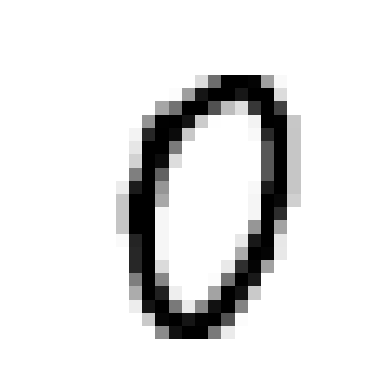

In [15]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = X.iloc[1000].values
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [16]:
y[1000]

'0'

In [17]:
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train = X_train.iloc[shuffle_index].reset_index(drop=True)
y_train = y_train.iloc[shuffle_index].reset_index(drop=True)

In [18]:
y_train

0        2
1        3
2        1
3        5
4        7
        ..
59995    8
59996    0
59997    9
59998    5
59999    7
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for
this classification task

In [19]:
y_train = y_train.astype(int) ## because y train is of type category, so if we use y_train_5 = (y_train == 5) we're going to get all false
y_test = y_test.astype(int)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Stochastic Gradient Descent Classifier

1. Why is SGDClassifier good for large datasets?

Most classifiers (like logistic regression or SVMs with batch training) try to look at the entire dataset at once to compute gradients (for optimization).

Imagine you have 60,000 MNIST images. A "batch" method computes a giant gradient using all 60,000 examples at once. That’s very memory- and compute-heavy.

SGD (Stochastic Gradient Descent) instead looks at one sample (or a small batch) at a time. It updates the model weights immediately, without waiting for the whole dataset.

This makes it way faster and lighter for big datasets.

You don’t need to load the whole dataset into memory.

In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=45)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=45)

In [21]:
sgd_clf.predict([some_digit])


c:\Users\sherr\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

Evaluating model performance using Cross Validation

In [22]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone
# skfolds = StratifiedKFold(n_splits=3, random_state=42,shuffle=True)
# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf) ##creates a clone of our model
#     X_train_folds = X_train.iloc[train_index] 
#     y_train_folds = (y_train_5.iloc[train_index])
#     X_test_fold = X_train.iloc[test_index]
#     y_test_fold = (y_train_5.iloc[test_index])
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct / len(y_pred))

In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.97015, 0.9483 , 0.9433 ])

In [24]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [25]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.9097 , 0.9096 ])

1. Inheriting from BaseEstimator

This makes the class behave like a scikit-learn estimator.

It allows you to use it in pipelines, cross-validation, etc.

But here it’s just a template — it doesn’t actually learn anything.

2. fit method
def fit(self, X, y=None):
    pass


Normally, .fit() is where the model would “train” by looking at X and y.

Here it just passes → meaning it does nothing at all.

So this classifier does not learn from the data.

3. predict method
def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)


For any input X, it returns an array of False values.

Shape: (len(X), 1) → one prediction for each row of X.

dtype=bool means predictions are booleans.

In context, this means it always predicts “Not 5” (False), no matter the input.

🔎 What’s the point?

It’s basically a baseline classifier.
For example, if you’re trying to detect the digit 5 in the MNIST dataset, this classifier always says:

“Nope, this is not a 5.”

It helps you compare:

If your “real” classifier isn’t doing much better than this, then something’s wrong.

This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others).

In [26]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)